# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [3]:
# import pandas
import pandas as dp

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [5]:
# load imdb dataset as pandas dataframe
imdb_df = dp.read_csv("imdb_1000.csv")
print(imdb_df)

     star_rating                                              title  \
0            9.3                           The Shawshank Redemption   
1            9.2                                      The Godfather   
2            9.1                             The Godfather: Part II   
3            9.0                                    The Dark Knight   
4            8.9                                       Pulp Fiction   
5            8.9                                       12 Angry Men   
6            8.9                     The Good, the Bad and the Ugly   
7            8.9      The Lord of the Rings: The Return of the King   
8            8.9                                   Schindler's List   
9            8.9                                         Fight Club   
10           8.8  The Lord of the Rings: The Fellowship of the Ring   
11           8.8                                          Inception   
12           8.8     Star Wars: Episode V - The Empire Strikes Back   
13    

In [6]:
# show first 5 rows of imdb_df
imdb_df.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [7]:
# load bikes dataset as pandas dataframe
dfb=pd.read_csv('bikes.csv', sep=";",parse_dates=['Date'])

In [8]:
# show first 3 rows of bikes_df
dfb.head(3)

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
1,2012-02-01,00:00,43,83,153,68,11.0,53,6,1,21.0
2,2012-03-01,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [10]:
# list columns of imdb_df
imdb_df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [11]:
# what are the datatypes of values in columns
imdb_df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [12]:
# list first 5 movie titles
imdb_df['title'].head()

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [13]:
# show only movie title and genre
imdb_df[['title','genre']].head()

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [14]:
# show the type of duration column
ar=imdb_df['duration']
print(type(ar))

<class 'pandas.core.series.Series'>


In [15]:
# show duration values of movies as numpy arrays
import numpy as np
x = np.stack(imdb_df['duration'])
print(x)

[142 175 200 152 154  96 161 201 195 139 178 148 124 142 179 169 133 207
 146 121 136 130 130 106 127 116 175 118 110  87 125 112 102 107 119  87
 169 115 112 109 189 110 150 165 155 137 113 165  95 151 155 153 125 130
 116  89 137 117  88 165 170  89 146  99  98 116 156 122 149 134 122 136
 157 123 119 137 128 120 229 107 134 103 177 129 102 216 136  93  68 189
  99 108 113 181 103 138 110 129  88 160 126  91 116 125 143  93 102 132
 153 183 160 120 138 140 153 170 129  81 127 131 172 115 108 107 129 156
  96  91  95 162 130  86 186 151  96 170 118 161 131 126 131 129 224 180
 105 117 140 119 124 130 139 107 132 117 126 122 178 238 149 172  98 116
 116 123 148 123 182  92  93 100 135 105  94 140  83  95  98 143  99  98
 121 163 121 167 188 121 109 110 129 127  94 107 100 117 129 120 121 133
 111 122 101 134 165 138 212 154  89 134  93 114  88 130 101 158  99 108
 124 132 113 131 191 167 130 147 102  88 165 132 118 101 108 174  98  92
  98 106  85 101 105 115 115 124 105 103 138 184 12

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [16]:
# convert all the movie titles to uppercase
print(imdb_df['title'].str.upper())

0                               THE SHAWSHANK REDEMPTION
1                                          THE GODFATHER
2                                 THE GODFATHER: PART II
3                                        THE DARK KNIGHT
4                                           PULP FICTION
5                                           12 ANGRY MEN
6                         THE GOOD, THE BAD AND THE UGLY
7          THE LORD OF THE RINGS: THE RETURN OF THE KING
8                                       SCHINDLER'S LIST
9                                             FIGHT CLUB
10     THE LORD OF THE RINGS: THE FELLOWSHIP OF THE RING
11                                             INCEPTION
12        STAR WARS: EPISODE V - THE EMPIRE STRIKES BACK
13                                          FORREST GUMP
14                 THE LORD OF THE RINGS: THE TWO TOWERS
15                                          INTERSTELLAR
16                       ONE FLEW OVER THE CUCKOO'S NEST
17                             

## Plotting a column

Use ``.plot()`` function!

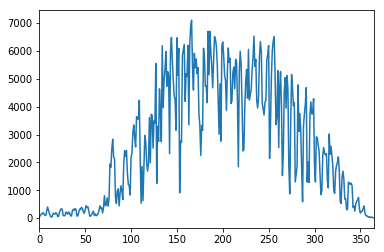

In [18]:
# plot the bikers travelling to Berri1 over the year
import matplotlib.pyplot as plt 

dfb['Berri1'].plot()
plt.show()

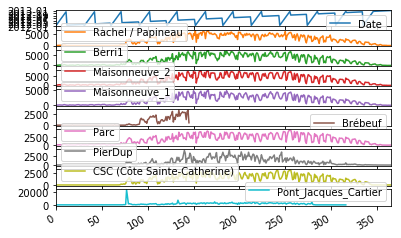

In [19]:
# plot all the columns of bikes_df
dfb.plot(subplots=True)
plt.show()

## Value counts

Get count of unique values in a particular column/Series.

In [20]:
# what are the unique genre in imdb_df?
imdb_df['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

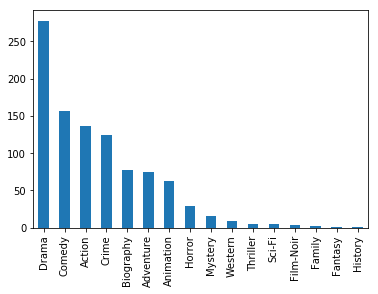

In [21]:
# plotting value counts of unique genres as a bar chart
imdb_df['genre'].value_counts().plot.bar()

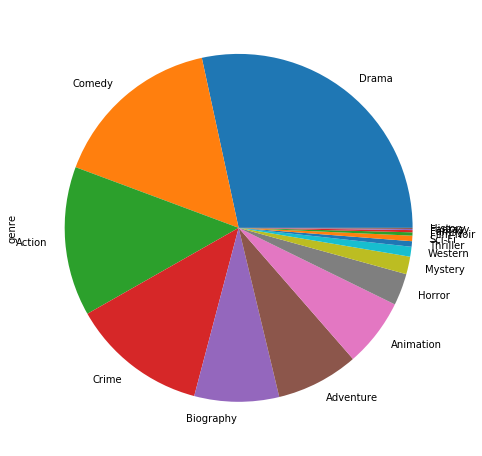

In [22]:
# plotting value counts of unique genres as a pie chart
imdb_df["genre"].value_counts().plot(kind="pie",figsize=(10,8))

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [23]:
# show index of bikes_df
dfb.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [25]:
# get row for date 2012-01-01
dfb[dfb['Date']=='2012-01-01']

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0


#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [26]:
# show 11th row of imdb_df using iloc
imdb_df.iloc[11]

star_rating                                                     8.8
title                                                     Inception
content_rating                                                PG-13
genre                                                        Action
duration                                                        148
actors_list       [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...
Name: 11, dtype: object

## Selecting rows where column has a particular value

In [27]:
# select only those movies where genre is adventure
x = imdb_df['title'].loc[data['genre'] == 'Adventure']
print(x)

7          The Lord of the Rings: The Return of the King
10     The Lord of the Rings: The Fellowship of the Ring
14                 The Lord of the Rings: The Two Towers
15                                          Interstellar
54                                    Back to the Future
68                                              Das Boot
71                                    North by Northwest
85                                    Lawrence of Arabia
101                      Monty Python and the Holy Grail
114                                 Inglourious Basterds
120                                     The Great Escape
128                                        The Gold Rush
133                                               Barfi!
137                         The Bridge on the River Kwai
140                                    The Wages of Fear
142                    Lagaan: Once Upon a Time in India
164                                        Into the Wild
179                            

In [28]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
x = imdb_df[(data['star_rating'] > 8) & (data['duration'] > 130)]
print(x)

     star_rating                                              title  \
0            9.3                           The Shawshank Redemption   
1            9.2                                      The Godfather   
2            9.1                             The Godfather: Part II   
3            9.0                                    The Dark Knight   
4            8.9                                       Pulp Fiction   
6            8.9                     The Good, the Bad and the Ugly   
7            8.9      The Lord of the Rings: The Return of the King   
8            8.9                                   Schindler's List   
9            8.9                                         Fight Club   
10           8.8  The Lord of the Rings: The Fellowship of the Ring   
11           8.8                                          Inception   
13           8.8                                       Forrest Gump   
14           8.8              The Lord of the Rings: The Two Towers   
15    

## Adding a new column to DataFrame

In [29]:
# add a weekday column to bikes_df
dfb['weekday']=dfb['Date'].apply(lambda time:time.dayofweek)
dfb

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0,6
1,2012-02-01,00:00,43,83,153,68,11.0,53,6,1,21.0,2
2,2012-03-01,00:00,58,135,248,104,2.0,89,3,2,15.0,3
3,2012-04-01,00:00,61,144,318,116,2.0,111,8,1,19.0,6
4,2012-05-01,00:00,95,197,330,124,6.0,97,13,2,16.0,1
5,2012-06-01,00:00,75,146,244,98,4.0,86,4,0,17.0,4
6,2012-07-01,00:00,54,98,108,80,5.0,53,6,2,9.0,6
7,2012-08-01,00:00,63,95,98,62,13.0,64,11,1,23.0,2
8,2012-09-01,00:00,173,244,432,165,9.0,198,12,2,23.0,5
9,2012-10-01,00:00,241,397,563,238,6.0,275,18,3,46.0,0


## Deleting an existing column from DataFrame

In [30]:
# remove column 'Unnamed: 1' from bikes_df
dfb.drop('Unnamed: 1',axis=1,inplace=True)
dfb.head()

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
0,2012-01-01,16,35,51,38,5.0,26,10,0,27.0,6
1,2012-02-01,43,83,153,68,11.0,53,6,1,21.0,2
2,2012-03-01,58,135,248,104,2.0,89,3,2,15.0,3
3,2012-04-01,61,144,318,116,2.0,111,8,1,19.0,6
4,2012-05-01,95,197,330,124,6.0,97,13,2,16.0,1


## Deleting a row in DataFrame

In [31]:
# remove row no. 1 from bikes_df
dfb.drop(dfb.index[0])

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
1,2012-02-01,43,83,153,68,11.0,53,6,1,21.0,2
2,2012-03-01,58,135,248,104,2.0,89,3,2,15.0,3
3,2012-04-01,61,144,318,116,2.0,111,8,1,19.0,6
4,2012-05-01,95,197,330,124,6.0,97,13,2,16.0,1
5,2012-06-01,75,146,244,98,4.0,86,4,0,17.0,4
6,2012-07-01,54,98,108,80,5.0,53,6,2,9.0,6
7,2012-08-01,63,95,98,62,13.0,64,11,1,23.0,2
8,2012-09-01,173,244,432,165,9.0,198,12,2,23.0,5
9,2012-10-01,241,397,563,238,6.0,275,18,3,46.0,0
10,2012-11-01,194,273,443,182,7.0,258,12,0,20.0,3


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [33]:
# group imdb_df by movie genres
grp=imdb_df.groupby('genre')
grp.groups

{'Action': Int64Index([  3,  11,  12,  19,  20,  36,  37,  43,  44,  45,
             ...
             884, 885, 896, 906, 908, 918, 954, 963, 967, 976],
            dtype='int64', length=136),
 'Adventure': Int64Index([  7,  10,  14,  15,  54,  68,  71,  85, 101, 114, 120, 128, 133,
             137, 140, 142, 164, 179, 204, 206, 214, 222, 224, 245, 271, 299,
             309, 310, 328, 333, 336, 339, 359, 362, 368, 376, 393, 419, 424,
             429, 445, 454, 479, 510, 520, 522, 537, 551, 555, 564, 576, 605,
             629, 642, 658, 662, 698, 727, 754, 758, 794, 814, 852, 891, 898,
             900, 909, 911, 932, 935, 936, 937, 943, 953, 975],
            dtype='int64'),
 'Animation': Int64Index([ 30,  55,  61,  64,  69,  81, 117, 126, 131, 147, 160, 167, 192,
             193, 241, 256, 277, 294, 303, 305, 308, 332, 343, 357, 378, 381,
             386, 395, 414, 417, 443, 453, 461, 471, 487, 489, 494, 498, 501,
             512, 518, 541, 607, 617, 625, 656, 657, 664, 669, 6

In [34]:
# get crime movies group
grp.get_group('Crime')

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
23,8.7,The Usual Suspects,R,Crime,106,"[u'Kevin Spacey', u'Gabriel Byrne', u'Chazz Pa..."
28,8.6,Leon: The Professional,R,Crime,110,"[u'Jean Reno', u'Gary Oldman', u'Natalie Portm..."
34,8.6,American History X,R,Crime,119,"[u'Edward Norton', u'Edward Furlong', u""Beverl..."
40,8.5,The Green Mile,R,Crime,189,"[u'Tom Hanks', u'Michael Clarke Duncan', u'Dav..."
49,8.5,The Departed,R,Crime,151,"[u'Leonardo DiCaprio', u'Matt Damon', u'Jack N..."


In [38]:
# get mean of movie durations for each group
grp['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [39]:
# change duration of all movies in a particular genre to mean duration of the group
grp_crime=grp.get_group('Crime')
grp_crime['duration']=grp_crime['duration'].mean()
grp_crime[['title','duration']]

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,duration
0,The Shawshank Redemption,122.298387
1,The Godfather,122.298387
2,The Godfather: Part II,122.298387
4,Pulp Fiction,122.298387
21,City of God,122.298387
23,The Usual Suspects,122.298387
28,Leon: The Professional,122.298387
34,American History X,122.298387
40,The Green Mile,122.298387
49,The Departed,122.298387


In [41]:
# drop groups/genres that do not have average movie duration greater than 120.
dropgrp=grp.filter(lambda m: m['duration'].mean() > 120)
dropgrp.reset_index(drop=True, inplace=True)
dropgrp.groupby('genre').mean()

,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Biography,7.862338,131.844156
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Western,8.255556,136.666667


In [42]:
# group weekday wise bikers count
grpb=dfb.groupby('weekday')
grpb.describe()

Rachel / Papineau                                                 \
                    count         mean          std  min     25%     50%   
weekday                                                                    
0                    53.0  2546.528302  1981.116358  0.0  241.00  2795.0   
1                    52.0  2463.634615  1852.608961  0.0  286.00  2530.5   
2                    52.0  2720.750000  2009.300326  0.0  613.75  2652.5   
3                    52.0  2833.173077  2108.546472  0.0  727.00  2617.0   
4                    52.0  2873.115385  2212.995819  0.0  397.25  2482.5   
5                    52.0  2503.038462  1943.808077  0.0  682.25  2288.0   
6                    53.0  2306.226415  1996.767413  0.0  251.00  1779.0   

                         Berri1               ... CSC (Côte Sainte-Catherine)  \
             75%     max  count         mean  ...                         75%   
weekday                                       ...                               
0        4078.00  6104.0   53.0  2645.396226  ...                     1934.00   
1        3914.25  5721.0   52.0  2549.288462  ...                     1794.25   
2        4777.75  5887.0   52.0  3011.980769  ...                     2353.50   
3        4964.75  6243.0   52.0  3039.307692  ...                     2218.25   
4        5025.25  6595.0   52.0  2993.288462  ...                     2099.50   
5        4392.50  6170.0   52.0  2379.211538  ...                     1343.50   
6        4355.00  5952.0   53.0  2140.150943  ...                     1305.00   

                Pont_Jacques_Cartier                                        \
            max                count         mean          std  min    25%   
weekday                                                                      
0        2720.0                 46.0  1495.326087  2049.411385  0.0  31.75   
1        2794.0                 46.0  1129.717391  1113.952396  0.0  12.50   
2        3092.0                 45.0  1357.311111  1320.639632  0.0  26.00   
3        3076.0                 43.0  1466.720930  1223.394484  0.0  24.00   
4        2913.0                 45.0  1484.400000  1252.367547  0.0  34.00   
5        2883.0                 46.0  1174.217391  1090.969048  0.0  20.00   
6        3124.0                 46.0  1945.065217  3551.191865  0.0  21.00   

                                   
            50%      75%      max  
weekday                            
0        1232.5  2283.00  12593.0  
1         937.0  1998.75   3331.0  
2        1137.0  2734.00   4153.0  
3        1421.0  2414.00   4858.0  
4        1662.0  2565.00   4577.0  
5         770.5  2355.00   2880.0  
6        1319.0  2684.75  23092.0  

[7 rows x 72 columns]

In [43]:
# get weekday wise biker count
grpb.count()

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
weekday,,,,,,,,,,
0,53,53,53,53,53,22,53,53,53,46
1,52,52,52,52,52,21,52,52,52,46
2,52,52,52,52,52,21,52,52,52,45
3,52,52,52,52,52,20,52,52,52,43
4,52,52,52,52,52,20,52,52,52,45
5,52,52,52,52,52,20,52,52,52,46
6,53,53,53,53,53,22,53,53,53,46


In [44]:
# plot weekday wise biker count for 'Berri1'
grpb['Berri1'].count()

weekday
0    53
1    52
2    52
3    52
4    52
5    52
6    53
Name: Berri1, dtype: int64

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)